# Benchmarks for DOD Game Design

First lets load in our benchmark files generated from the C++ program

In [1]:
import numpy as np

renderFile=open('./renderBench.txt',"r")
renderData=renderFile.readlines()

updateFile=open('./updateBench.txt',"r")
updateData=updateFile.readlines()
timings={}
updateDurations=[]
renderDurations=[]
updateResolution=''
renderResolution=''
for i in updateData :
    if 'Duration' in i :
        data=i.split('\t')
        updateDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        updateResolution=data[2]
        
for i in renderData :
    if 'Duration' in i :
        data=i.split('\t')
        renderDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        renderResolution=data[2]
print('Number of elements {0}'.format(len(renderDurations)))
timings['render']=renderDurations
timings['update']=updateDurations


Number of elements 10995


Now we can do some data analysis on the times and see what happens

In [2]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.DataFrame(data=timings)
df.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])


,render,update
count,10995.000000,10995.000000
mean,55.585357,2436.873852
std,26.018092,90.642536
min,34.000000,2319.000000
25%,40.000000,2388.000000
50%,45.000000,2405.000000
75%,65.000000,2445.000000
90%,87.000000,2548.000000
99%,144.000000,2788.060000
99.9%,243.126000,3219.006000


Text(0.0, 0.5, 'Number of Samples')

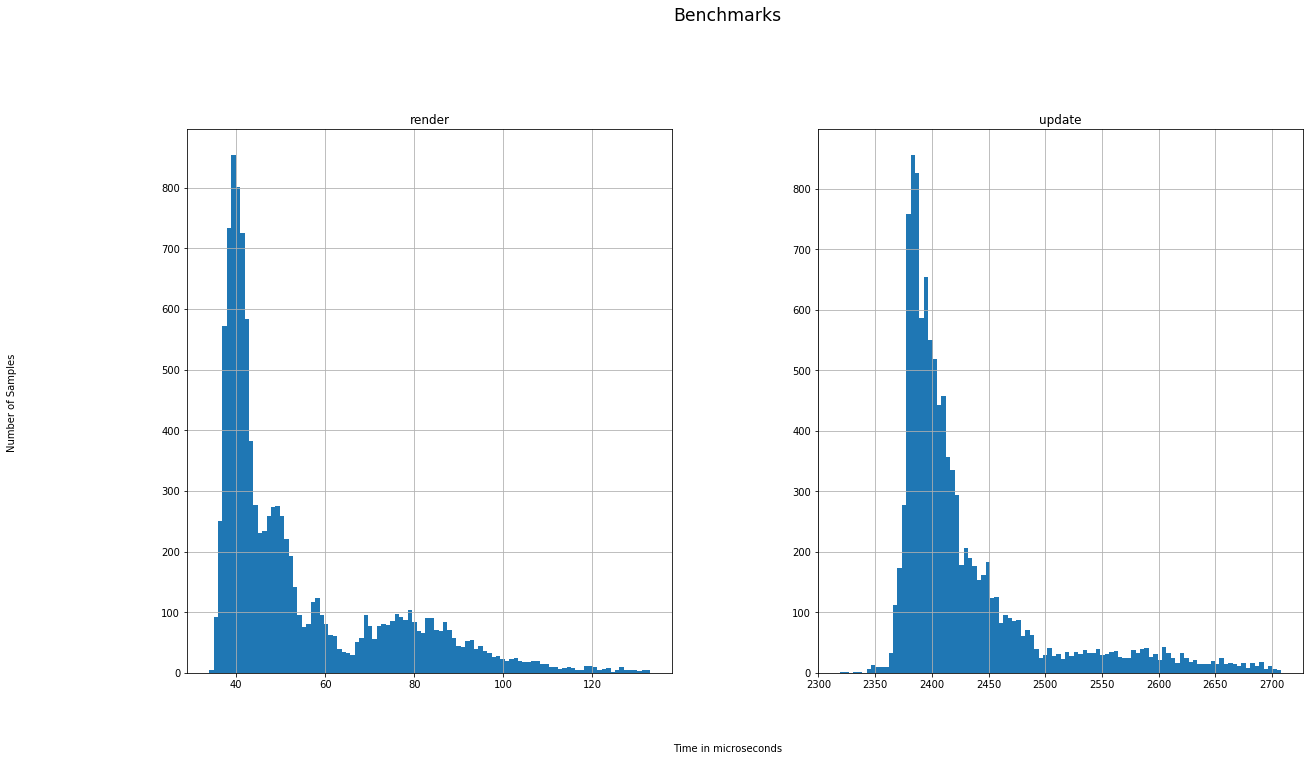

In [3]:
S = df
# keep only the ones that are within +3 to -3 standard deviations  
S=  S[~((S-S.mean()).abs() > 3*S.std())]

ndf = pd.DataFrame(data=S)
average = ndf.mean()
average.name='Average'
ndf.append(average)
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,
                        figsize=(20, 10))


ndf.hist(grid=True,  bins=100,ax=axes )
#plt.axvline(ndf.mean(), color='blue', linewidth=2)
#plt.axvline(ndf.mean(), color='green', linewidth=2)
# set title and axis labels
plt.suptitle('Benchmarks', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.0, 'Time in {0}'.format(renderResolution), ha='center')
fig.text(0.0, 0.5, 'Number of Samples', va='center', rotation='vertical')
